In [569]:
#!pip install pandoc
#!pip install texlive-xetex-extra
#!pip install LaTex
#import pandoc

#import os 
#os.getcwd()
jupyter nbconvert --to FORMAT notebook.ipynb

SyntaxError: invalid syntax (1886447961.py, line 8)

In [ ]:
os.chdir('/Users/brandonmorgeson/Desktop/Leading Change/HW2_Retention_Exercise')

In [ ]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel(r'Midterm assignment data set.xlsx')

In [463]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,1,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2


In [ ]:
df.info()

### *Varibles to pay attention to with correlation to Attrition*
##### *Refer to Heat Maps below: take note on variables*
##### Priorty order: (1); Overtime (2); TotalWorking Years, Job Level  (3); Years in Current Role, Years with current manager, Marital Status, Montly Income, Age  (4); Stock Option  (5); Years at Company, Job Involvement  (6) JobSatisfaction, Environment Satisfaction

## Attrition Rates within each department

In [353]:
#Converting Attrition into a numeric
df2 = df.copy()
df2["Attrition"] = df.apply(lambda x: 1 if x.Attrition == "Yes" else 0, axis = 1)
grouped_dept = df2.groupby(["Department"]).mean()
grouped_dept

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Department,,,,,,,,,,,,,,,,,,,,,,,
Human Resources,37.809524,0.190476,8.698413,2.968254,1.0,1205.269841,2.682540,2.746032,2.031746,2.603175,6654.507937,2.936508,14.761905,3.142857,2.888889,0.777778,11.555556,2.555556,2.920635,7.238095,3.539683,1.777778,3.666667
Research & Development,37.042664,0.138398,9.144641,2.899063,1.0,1006.503642,2.744017,2.741935,1.977107,2.726327,6281.252862,2.733611,15.291363,3.162331,2.708637,0.804370,11.342352,2.792924,2.725286,6.864724,4.155047,2.137357,4.084287
Sales,36.542601,0.206278,9.365471,2.934978,1.0,1038.946188,2.679372,2.701794,2.255605,2.751121,6959.172646,2.571749,15.096413,3.136771,2.695067,0.773543,11.105381,2.847534,2.816143,7.284753,4.486547,2.354260,4.271300


###### HR 19%
###### R&D 14%
###### Sales 21% 

## Mean within each department grouped by attrition

In [352]:
df.groupby(["Department","Attrition"]).mean()

Age  DistanceFromHome  Education  \
Department             Attrition                                           
Human Resources        No         39.627451          7.588235   2.960784   
                       Yes        30.083333         13.416667   3.000000   
Research & Development No         37.615942          8.964976   2.910628   
                       Yes        33.473684         10.263158   2.827068   
Sales                  No         37.135593          8.991525   2.960452   
                       Yes        34.260870         10.804348   2.836957   

                                  EmployeeCount  EmployeeNumber  \
Department             Attrition                                  
Human Resources        No                   1.0     1187.470588   
                       Yes                  1.0     1280.916667   
Research & Development No                   1.0     1015.620773   
                       Yes                  1.0      949.744361   
Sales                  No                   1.0     1032.782486   
                       Yes                  1.0     1062.663043   

                                  EnvironmentSatisfaction  JobInvolvement  \
Department             Attrition                                            
Human Resources        No                        2.764706        2.803922   
                       Yes                       2.333333        2.500000   
Research & Development No                        2.787440        2.771739   
                       Yes                       2.473684        2.556391   
Sales                  No                        2.734463        2.762712   
                       Yes                       2.467391        2.467391   

                                  JobLevel  JobSatisfaction  MonthlyIncome  \
Department             Attrition                                             
Human Resources        No         2.196078         2.705882    7345.980392   
                       Yes        1.333333         2.166667    3715.750000   
Research & Development No         2.066425         2.769324    6630.326087   
                       Yes        1.421053         2.458647    4108.075188   
Sales                  No         2.324859         2.810734    7232.240113   
                       Yes        1.989130         2.521739    5908.456522   

                                  NumCompaniesWorked  PercentSalaryHike  \
Department             Attrition                                          
Human Resources        No                   2.921569          14.980392   
                       Yes                  3.000000          13.833333   
Research & Development No                   2.702899          15.288647   
                       Yes                  2.924812          15.308271   
Sales                  No                   2.471751          15.132768   
                       Yes                  2.956522          14.956522   

                                  PerformanceRating  RelationshipSatisfaction  \
Department             Attrition                                                
Human Resources        No                  3.156863                  2.843137   
                       Yes                 3.083333                  3.083333   
Research & Development No                  3.157005                  2.739130   
                       Yes                 3.195489                  2.518797   
Sales                  No                  3.144068                  2.706215   
                       Yes                 3.108696                  2.652174   

                                  StockOptionLevel  TotalWorkingYears  \
Department             Attrition                                        
Human Resources        No                 0.764706          12.843137   
                       Yes                0.833333           6.083333   
Research & Development No                 0.850242          11.865942   
                       Yes           

##### *Notes from above stats*
#### **Sales with attrition**
##### Averages: highest avg year w/ curr manager, highest avg years since last promotion, highest avgyears in current role, highest avg years at company, highest avh training times last year, highest avh total working years, lowest avh stock option, lowest avg job involvement 
###### *Contrary; has highest monthly income, highest job satisfaction, highest job level*
#### **HR with attrition**
##### Averages: lowest age, most distance from home, highest education, lowest environment satisfaction, lowest job level, job satisfaction, monthly income, percent salary hike, performance rating, total working years, years at company
###### *Contrary; highest relationship satisfaciton, lowest years since last promotion, and lowest years with curr manager*
##### *Note: In each department with attrition, the distance from home is in the double digits compared to those who stayed 
##### *Note: Avg age is lower in each department among those who left

## **Statistics within each department grouped by attrition**

In [354]:
df.groupby(["Department","Attrition"]).describe()

Age                                   \
                                  count       mean       std   min   25%   
Department             Attrition                                           
Human Resources        No          51.0  39.627451  8.849770  24.0  33.5   
                       Yes         12.0  30.083333  6.584532  19.0  26.0   
Research & Development No         828.0  37.615942  8.931681  18.0  31.0   
                       Yes        133.0  33.473684  9.902233  18.0  28.0   
Sales                  No         354.0  37.135593  8.771169  18.0  31.0   
                       Yes         92.0  34.260870  9.690677  18.0  28.0   

                                                    DistanceFromHome  \
                                   50%    75%   max            count   
Department             Attrition                                       
Human Resources        No         39.0  44.50  59.0             51.0   
                       Yes        29.5  34.00  44.0             12.0   
Research & Development No         36.0  43.25  60.0            828.0   
                       Yes        31.0  38.00  58.0            133.0   
Sales                  No         36.0  42.75  60.0            354.0   
                       Yes        32.5  41.00  55.0             92.0   

                                                                              \
                                       mean       std  min  25%   50%    75%   
Department             Attrition                                               
Human Resources        No          7.588235  7.808141  1.0  2.0   5.0  10.00   
                       Yes        13.416667  8.005207  1.0  7.5  15.0  20.50   
Research & Development No          8.964976  8.069527  1.0  2.0   7.0  13.25   
                       Yes        10.263158  8.386402  1.0  3.0   8.0  16.00   
Sales                  No          8.991525  7.912942  1.0  2.0   7.0  12.00   
                       Yes        10.804348  8.617946  1.0  3.0   9.0  16.50   

                                       Education                           \
                                   max     count      mean       std  min   
Department             Attrition                                            
Human Resources        No         26.0      51.0  2.960784  0.958348  1.0   
                       Yes        23.0      12.0  3.000000  1.128152  1.0   
Research & Development No         29.0     828.0  2.910628  1.024126  1.0   
                       Yes        29.0     133.0  2.827068  1.026256  1.0   
Sales                  No         29.0     354.0  2.960452  1.044948  1.0   
                       Yes        29.0      92.0  2.836957  0.975267  1.0   

                                                     EmployeeCount            \
                                  25%  50%  75%  max         count mean  std   
Department             Attrition                                               
Human Resources        No         2.0  3.0  4.0  5.0          51.0  1.0  0.0   
                       Yes        2.0  3.0  4.0  5.0          12.0  1.0  0.0   
Research & Development No         2.0  3.0  4.0  5.0         828.0  1.0  0.0   
                       Yes        2.0  3.0  4.0  5.0         133.0  1.0  0.0   
Sales                  No         2.0  3.0  4.0  5.0         354.0  1.0  0.0   
                       Yes        2.0  3.0  4.0  5.0          92.0  1.0  0.0   

                                                          EmployeeNumber  \
                                  min  25%  50%  75%  max          count   
Department             Attrition                                           
Human Resources        No         1.0  1.0  1.0  1.0  1.0           51.0   
                       Yes        1.0  1.0  1.0  1.0  1.0           12.0   
Research & Development No         1.0  1.0  1.0  1.0  1.0          828.0   
                       Yes        1.0  1.0  1.0  1.0  1.0          133.0   
Sales                  No         

##### **Stats on above**
#### **HR current employee stats** 
> ##### min age 24, every other cat is 18 or 19
> ##### All HR best work life balance  
> ##### All HR had lowest training time last year. 
#### **HR attrition stats**
> ##### lowest max: age 44, next highest in any other was 55, job level of 3.0, years in current role
> ##### lowest median: distance from home 15 and the next highest was 9, JobInvolvement of 2.5 and also second to lowest mean, Job Satisfaction of 2.0 and lowest mean of 2.16
> ##### lowest mean: Job satisfaction  of 2.16, next is 2.5, environment satisfaction at 2.33, next is 2.47 w/ R&D, job level of 1.3, mean performance rating but everything is the same, relationship satisfaction
> ##### lowest median, mean, and max: income, years with company,  percent salary hike median of 13 (next is 14), lowest mean of 13.8 (next is sales 14.9), lowest max of 22, total working years at 7.25 (next 10 R&D), lowest mean of 6.5 (next sales 7.0), lowest max 24 (next sales 33), promotes the fastest, lowest years with current manager
> ##### All HR best work life balance
> ##### All HR had lowest training time last year
##### *Note: HR only has 12 with attrition and overall 63. the other departments are over 900 and 400*
#### **HR & Sales attrition stats**
> ##### median of 2.0 environment satisfaction. R&D has a median of 3.0. 
#### **R&D**
> ##### close second lowest mean stock option level
> ##### with attrition had worst work life balance
#### **Sales**
> ##### with attrition lowest mean stock option level


#### *Takeaway*: HR attrition is the youngest, lives the furthest away, low job satisfaction, low environment satisfaction, low job level, low relationship satisfaction, lowest years with company, lowest total working years, they promote the fastest (probably because the churn rate), they have good work life balance, and the lowest amount of training. There isn't many of them - 63 overall 

##### *Note this is only numeric variables

## **Statistics grouped by Attrition**

In [374]:
df.groupby("Attrition").mean()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,
No,37.561233,8.915653,2.927007,1.0,1027.656123,2.771290,2.770479,2.145985,2.778589,6832.739659,2.645580,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,10.632911,2.839662,1.0,1010.345992,2.464135,2.518987,1.637131,2.468354,4787.092827,2.940928,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


#### **Stats from above**
> ##### People who left had lower average age, environment satisfaction, involvment, job level, monthly income, relationship satisfaction, total working years, years at company, years in current role, and had higher avg distance from home

##### *Takeaway*: Overall people who left weren't experienced (lower avg years at company, total working years, monthly income, job level, and age)

### Statistics on Job Level

In [443]:
df.groupby(["Department", "Attrition", "JobLevel"]).describe()

Age                              \
                                           count       mean        std   min   
Department             Attrition JobLevel                                      
Human Resources        No        1          23.0  35.695652   8.243095  24.0   
                                 2          13.0  38.538462   4.943268  30.0   
                                 3           4.0  40.750000  11.026483  29.0   
                                 4           4.0  46.750000   6.800735  40.0   
                                 5           7.0  49.857143   7.221001  41.0   
                       Yes       1          10.0  28.300000   5.121849  19.0   
                                 3           2.0  39.000000   7.071068  34.0   
Research & Development No        1         333.0  33.528529   8.303175  18.0   
                                 2         266.0  37.296992   7.291644  22.0   
                                 3         116.0  40.387931   7.832787  27.0   
                                 4          67.0  47.701493   6.559783  29.0   
                                 5          46.0  47.369565   5.630704  39.0   
                       Yes       1         101.0  31.257426   8.869784  18.0   
                                 2          15.0  36.933333   7.449513  22.0   
                                 3          13.0  42.153846  11.149336  28.0   
                                 4           1.0  39.000000        NaN  39.0   
                                 5           3.0  51.333333   9.073772  41.0   
Sales                  No        1          44.0  30.840909   7.566583  18.0   
                                 2         203.0  35.733990   7.794907  24.0   
                                 3          66.0  39.181818   7.932230  27.0   
                                 4          30.0  47.766667   6.473731  33.0   
                                 5          11.0  46.909091   5.068620  40.0   
                       Yes       1          32.0  27.437500   8.068007  18.0   
                                 2          37.0  35.513514   7.823120  24.0   
                                 3          17.0  39.941176   8.340193  29.0   
                                 4           4.0  46.000000   6.683313  40.0   
                                 5           2.0  48.500000   4.949747  45.0   

                                                                     \
                                             25%   50%    75%   max   
Department             Attrition JobLevel                             
Human Resources        No        1         29.50  35.0  40.00  59.0   
                                 2         36.00  39.0  42.00  46.0   
                                 3         33.50  40.0  47.25  54.0   
                                 4         41.50  46.5  51.75  54.0   
                                 5         44.00  50.0  55.50  59.0   
                       Yes       1         26.00  28.0  30.75  37.0   
                                 3         36.50  39.0  41.50  44.0   
Research & Development No        1         27.00  33.0  38.00  59.0   
                                 2         32.00  36.0  41.75  58.0   
                                 3         35.00  39.0  46.00  60.0   
                                 4         43.00  49.0  53.00  59.0   
                                 5         42.25  47.5  50.75  60.0   
                       Yes       1         26.00  29.0  34.00  58.0   
                                 2         33.50  36.0  38.00  52.0   
                                 3         31.00  44.0  51.00  58.0   
                                 4         39.00  39.0  39.00  39.0   
                                 5         48.00  55.0  56.50  58.0   
Sales                  No        1         25.75  31.0  35.00  52.0   
                                 2         30.00  34.0  40.00  60.0   
                                 3         34.00  37.0  42.50  60.0   
           

In [ ]:
grouped = df.groupby(["Department", "Attrition", "JobLevel"]).describe()
pcts =  grouped.groupby(level=0).apply(lambda x:
                                                100 * x / (x.sum()))
pcts.head(30)

### *Notes on stats above
#### Most people that left HR were Joblevel 1. Not high level. Same for R&D. Sales was 1&2

### Statistics on Performance Reviews

In [455]:
df.groupby(["Department", "PerformanceRating", "Attrition"]).mean()

Age  \
Department             PerformanceRating Attrition              
Human Resources        3                 No         39.604651   
                                         Yes        29.454545   
                       4                 No         39.750000   
                                         Yes        37.000000   
Research & Development 3                 No         37.601719   
                                         Yes        33.682243   
                       4                 No         37.692308   
                                         Yes        32.615385   
Sales                  3                 No         37.049505   
                                         Yes        34.402439   
                       4                 No         37.647059   
                                         Yes        33.100000   

                                                    DistanceFromHome  \
Department             PerformanceRating Attrition                     
Human Resources        3                 No                 7.767442   
                                         Yes               14.090909   
                       4                 No                 6.625000   
                                         Yes                6.000000   
Research & Development 3                 No                 8.946991   
                                         Yes                9.654206   
                       4                 No                 9.061538   
                                         Yes               12.769231   
Sales                  3                 No                 8.871287   
                                         Yes               10.536585   
                       4                 No                 9.705882   
                                         Yes               13.000000   

                                                    Education  EmployeeCount  \
Department             PerformanceRating Attrition                             
Human Resources        3                 No          3.069767            1.0   
                                         Yes         2.909091            1.0   
                       4                 No          2.375000            1.0   
                                         Yes         4.000000            1.0   
Research & Development 3                 No          2.916905            1.0   
                                         Yes         2.859813            1.0   
                       4                 No          2.876923            1.0   
                                         Yes         2.692308            1.0   
Sales                  3                 No          2.970297            1.0   
                                         Yes         2.817073            1.0   
                       4                 No          2.901961            1.0   
                                         Yes         3.000000            1.0   

                                                    EmployeeNumber  \
Department             PerformanceRating Attrition                   
Human Resources        3                 No            1222.790698   
                                         Yes           1385.272727   
                       4                 No             997.625000   
                                         Yes            133.000000   
Research & Development 3                 No            1015.921203   
                                         Yes            945.233645   
                       4                 No            1014.007692   
                                         Yes            968.307692   
Sales                  3                 No            1042.808581   
                                         Yes           1065.695122   
                       4                 No             973.215686   
                                         Yes           1037.800000   

                                    

In [ ]:
grouped = df.groupby(["Department", "PerformanceRating", "Attrition"]).describe()
pcts =  grouped.groupby(level=0).apply(lambda x:
                                                100 * x / (x.sum()))
pcts.head(30)

#### *Notes on above
##### Takeaway: Overall 16% people with 4 performance left. In HR only one 4 left out of 12. 26 with a 4 left R&D which is 19.5% of people who left R&D. 10 left sales out of 92. 

### Statistics on Percent Salary Hike

In [ ]:
df.groupby(["Department", "Attrition", "PercentSalaryHike"]).describe().filter(like="Yes", axis=0)

In [522]:
grouped = df.groupby(["Attrition", "PercentSalaryHike"]).describe().filter(like="Yes",axis=0)
pcts =  grouped.groupby(level=0).apply(lambda x:
                                                100 * x / (x.sum()))
pcts.head(30)

Age                                \
                                 count      mean       std       min   
Attrition PercentSalaryHike                                            
Yes       11                 17.299578  6.620311  5.997566  6.535948   
          12                 13.924051  7.249887  7.851586  5.882353   
          13                 14.345992  6.560309  6.914350  5.882353   
          14                 10.126582  7.388889  8.495266  5.882353   
          15                  7.594937  6.958938  7.064506  6.535948   
          16                  5.907173  7.775723  9.040924  7.189542   
          17                  5.907173  6.721388  5.880483  7.189542   
          18                  5.485232  7.017638  7.486263  6.535948   
          19                  3.797468  5.899722  8.204615  6.209150   
          20                  2.953586  6.560309  6.491339  6.862745   
          21                  2.109705  6.150289  8.759607  6.209150   
          22                  5.063291  6.919076  5.641714  6.209150   
          23                  2.531646  6.662813  4.401805  7.189542   
          24                  2.531646  7.619525  7.769976  9.477124   
          25                  0.421941  3.895183       NaN  6.209150   

                                                                     \
                                  25%       50%       75%       max   
Attrition PercentSalaryHike                                           
Yes       11                 6.947891  6.557377  6.739526  7.417219   
          12                 6.947891  6.994536  7.650273  7.682119   
          13                 6.761787  6.448087  6.329690  7.284768   
          14                 6.823821  7.322404  8.060109  7.682119   
          15                 7.009926  7.103825  6.739526  6.887417   
          16                 6.265509  8.306011  8.333333  7.417219   
          17                 7.009926  6.775956  6.329690  7.284768   
          18                 6.451613  6.994536  7.103825  7.417219   
          19                 5.210918  5.027322  6.375228  6.887417   
          20                 6.823821  7.213115  6.010929  6.490066   
          21                 5.707196  5.027322  7.103825  6.092715   
          22                 7.568238  7.103825  6.921676  6.092715   
          23                 7.692308  7.431694  6.466302  5.165563   
          24                 8.064516  7.540984  6.375228  7.682119   
          25                 4.714640  4.153005  3.460838  2.516556   

                            DistanceFromHome                                 \
                                       count      mean       std        min   
Attrition PercentSalaryHike                                                   
Yes       11                       17.299578  5.086095  6.539581   3.225806   
          12                       13.924051  7.027262  7.995164   3.225806   
          13                       14.345992  6.397596  7.176637   3.225806   
          14                       10.126582  4.519147  6.660387   3.225806   
          15                        7.594937  5.992238  6.732066   3.225806   
          16                        5.907173  5.992238  7.997278   3.225806   
          17                        5.907173  6.719867  5.752006   6.451613   
          18                        5.485232  8.296946  7.655565   9.677419   
          19                        3.797468  7.723330  9.201967   3.225806   
          20                        2.953586  9.587582  8.012761   6.451613   
          21                        2.109705  3.595343  2.794394   3.225806   
          22                        5.063291  8.489005  8.472093   6.451613   
          23                        2.531646  6.191980  7.125204   6.451613   
          24                        2.531646  8.389134  7.884898   6.451613   
          25                        0.421941  5.992238       NaN  32.258065   

                                    

#### *Notes on above
###### People who left in HR were 16% salary hike of 17 and 22. R&D had 16% with salary hikes of 20-25. Sales had 20% with 17-19. 
###### Overall people who left 15% were those with salary hikes of 20-25


### Statistics on Years at Company

In [ ]:
df.groupby(["Department", "Attrition", "YearsAtCompany"]).describe().filter(like="Yes", axis=0)

In [ ]:
grouped = df.groupby(["Department","Attrition", "YearsAtCompany"]).describe()
pcts =  grouped.groupby(level=0).apply(lambda x:
                                                100 * x / (x.sum()))
pcts

#### Notes on Above
##### One person in HR left with 20 years (8% of people who left and 1.58% of all people in the department). R&D had 14 people with 10 years, 1 person with 13, 17, 18, 22, 31, 33, 40 (15.75% of people who left and 2.1% of all people). Sales had 4 people with 10 years, 1-2 people with 11, 13, 14, 15, 16, 19, 21, 23, 24, 32 (17.4% of people who left and 3.58% of all people). 

### Percentage statistics on each department grouped by attrition, performance rating, job level 

In [ ]:
df.groupby(["Department", "Attrition", "PerformanceRating", "JobLevel"]).mean()

In [559]:
grouped = df.groupby(["Department","Attrition", "PerformanceRating", "JobLevel"]).mean()
pcts =  grouped.groupby(level=0).apply(lambda x:
                                                100 * x / (x.sum()))
pcts

Age  \
Department             Attrition PerformanceRating JobLevel              
Human Resources        No        3                 1          6.874666   
                                                   2          7.184150   
                                                   3          7.418478   
                                                   4          9.241663   
                                                   5          9.115927   
                                 4                 1          5.783898   
                                                   2          7.732820   
                                                   3          8.487242   
                                                   4          7.544215   
                                                   5         11.127717   
                       Yes       3                 1          5.155214   
                                                   3          7.355610   
                                 4                 1          6.978399   
Research & Development No        3                 1          4.878824   
                                                   2          5.477775   
                                                   3          5.990553   
                                                   4          6.990913   
                                                   5          6.956783   
                                 4                 1          5.109065   
                                                   2          5.408973   
                                                   3          5.624322   
                                                   4          7.003235   
                                                   5          6.817158   
                       Yes       3                 1          4.585599   
                                                   2          5.224489   
                                                   3          6.179988   
                                                   4          5.717617   
                                                   5          7.525752   
                                 4                 1          4.571428   
                                                   2          5.937525   
Sales                  No        3                 1          4.367055   
                                                   2          5.051475   
                                                   3          5.549754   
                                                   4          6.703048   
                                                   5          6.449543   
                                 4                 1          4.360521   
                                                   2          5.096712   
                                                   3          5.521438   
                                                   4          7.149555   
                                                   5          7.503493   
                       Yes       3                 1          3.837703   
                                                   2          5.036037   
                                                   3          5.837260   
                                                   4          6.512466   
                                                   5          6.866404   
                                 4                 1          4.211866   
                                                   2          4.884349   
                                                   3          5.061319   

                                                             DistanceFromHome  \
Department             Attrition PerformanceRating JobLevel                     
Human Resources        No        3                 1                 4.479911   
                                                   2                 4.150966   
                                          

## Summary on data grouped by department for categorical variables

In [371]:
df.groupby("Department").describe(include = [object])

Attrition                 BusinessTravel         \
                           count unique top freq          count unique   
Department                                                               
Human Resources               63      2  No   51             63      3   
Research & Development       961      2  No  828            961      3   
Sales                        446      2  No  354            446      3   

                                           EducationField         \
                                  top freq          count unique   
Department                                                         
Human Resources         Travel_Rarely   46             63      5   
Research & Development  Travel_Rarely  682            961      4   
Sales                   Travel_Rarely  315            446      5   

                                             Gender                   JobRole  \
                                    top freq  count unique   top freq   count   
Department                                                                      
Human Resources         Human Resources   27     63      2  Male   43      63   
Research & Development    Life Sciences  440    961      2  Male  582     961   
Sales                         Marketing  159    446      2  Male  257     446   

                                                       MaritalStatus         \
                       unique                 top freq         count unique   
Department                                                                    
Human Resources             2     Human Resources   52            63      3   
Research & Development      6  Research Scientist  292           961      3   
Sales                       3     Sales Executive  326           446      3   

                                     Over18                 OverTime         \
                            top freq  count unique top freq    count unique   
Department                                                                    
Human Resources         Married   34     63      1   Y   63       63      2   
Research & Development  Married  433    961      1   Y  961      961      2   
Sales                   Married  206    446      1   Y  446      446      2   

                                 
                       top freq  
Department                       
Human Resources         No   46  
Research & Development  No  690  
Sales                   No  318

#### Department Attrition by Business Travel

In [ ]:
df.groupby(["Department", "Attrition", "BusinessTravel"]).describe()

In [ ]:
grouped = df.groupby(["Department", "Attrition", "BusinessTravel"]).describe()
pcts =  grouped.groupby(level=0).apply(lambda x:
                                                100 * x / (x.sum()))
pcts.head(30)

##### *Stats on Business Travel*
#### Count by Department
> ##### **HR current employee** 
>> ##### Non-Travel: 6.0 
>> ##### Travel_Frequently: 7.0
>> ##### Travel_Rarely: 38.0
> ##### **HR Attrition**
>> ##### Non-Travel: 0.0
>> ##### Travel_Frequently: 4.0
>> ##### Travel_Rarely: 8.0
> ##### **R&D current employee**
>> ##### Non-Travel: 89.0
>> ##### Travel_Frequently: 145.0
>> ##### Travel_Rarely: 594.0
> ##### **R&D Attrition**
>> ##### Non-Travel: 8.0
>> ##### Travel_Frequently: 37.0
>> ##### Travel_Rarely: 88.0
> ##### **Sales current employee**
>> ##### Non-Travel: 43.0
>> ##### Travel_Frequently: 56.0
>> ##### Travel_Rarely: 255.0
> ##### **Sales Attrition**
>> ##### Non-Travel: 4.0
>> ##### Travel_Frequently: 28.0
>> ##### Travel_Rarely: 60.0

#### Takeaway: Looked at percentages between each department overall, then each department grouped by attrition and nothing significant

In [ ]:
df.groupby(["Department", "Attrition", "EducationField"]).describe()

In [ ]:
grouped = df.groupby(["Department", "Attrition", "EducationField"]).describe()
pcts =  grouped.groupby(level=0).apply(lambda x:
                                                100 * x / (x.sum()))
pcts.head(30)

##### *Stats on Education Field*
#### Takeaway: There was no significant correlation and didn't analyze data

In [ ]:
df.groupby(["Department", "Attrition", "Gender"]).describe()

In [ ]:
grouped = df.groupby(["Gender", "Attrition",  "Department"]).describe()
pcts =  grouped.groupby(level=0).apply(lambda x:
                                                100 * x / (x.sum()))
pcts.head(30)

##### *Stats on Gender*
#### Percentage of Gender in departmetns
|  | HR | R&D | Sales |
|-|-|-|-|
| F | 31% | 39% | 42% |
| M | 68% | 60% | 57% |

#### Percentage of Gender in departments with attrition

|  | HR | R&D | Sales |
|-|-|-|-|
| F | 9.5% |  |  |
| M | 9.5% |  |  |

#### Takeaway: There's 68% males in HR. There wasn't a gender that left more in HR 

In [422]:
df.groupby(["Department", "Attrition", "JobRole"]).mean().head(3)

Age  DistanceFromHome  \
Department      Attrition JobRole                                        
Human Resources No        Human Resources  37.125000          6.600000   
                          Manager          48.727273         11.181818   
                Yes       Human Resources  30.083333         13.416667   

                                           Education  EmployeeCount  \
Department      Attrition JobRole                                     
Human Resources No        Human Resources   2.850000            1.0   
                          Manager           3.363636            1.0   
                Yes       Human Resources   3.000000            1.0   

                                           EmployeeNumber  \
Department      Attrition JobRole                           
Human Resources No        Human Resources     1222.950000   
                          Manager             1058.454545   
                Yes       Human Resources     1280.916667   

                                           EnvironmentSatisfaction  \
Department      Attrition JobRole                                    
Human Resources No        Human Resources                 2.675000   
                          Manager                         3.090909   
                Yes       Human Resources                 2.333333   

                                           JobInvolvement  JobLevel  \
Department      Attrition JobRole                                     
Human Resources No        Human Resources        2.775000  1.525000   
                          Manager                2.909091  4.636364   
                Yes       Human Resources        2.500000  1.333333   

                                           JobSatisfaction  MonthlyIncome  \
Department      Attrition JobRole                                           
Human Resources No        Human Resources         2.675000    4391.750000   
                          Manager                 2.818182   18088.636364   
                Yes       Human Resources         2.166667    3715.750000   

                                           NumCompaniesWorked  \
Department      Attrition JobRole                               
Human Resources No        Human Resources            2.950000   
                          Manager                    2.818182   
                Yes       Human Resources            3.000000   

                                           PercentSalaryHike  \
Department      Attrition JobRole                              
Human Resources No        Human Resources          15.100000   
                          Manager                  14.545455   
                Yes       Human Resources          13.833333   

                                           PerformanceRating  \
Department      Attrition JobRole                              
Human Resources No        Human Resources           3.150000   
                          Manager                   3.181818   
                Yes       Human Resources           3.083333   

                                           RelationshipSatisfaction  \
Department      Attrition JobRole                                     
Human Resources No        Human Resources                  2.925000   
                          Manager                          2.545455   
                Yes       Human Resources                  3.083333   

                                           StockOptionLevel  \
Department      Attrition JobRole                             
Human Resources No        Human Resources          0.725000   
                          Manager                  0.909091   
                Yes       Human Resources          0.833333   

                                           TotalWorkingYears  \
Department      Attrition JobRole                              
Human Resources No        Human Resources           8.800000   
                          Manager                  27.545455   
                Yes       H

##### *Stats on Job Role*
#### Takeaway: In HR the people that left were no managers, avg younger age of 30, and larger avg distance from home of 13

In [432]:
df.groupby(["Department", "Attrition", "MaritalStatus"]).mean().head(6)

Age  DistanceFromHome  \
Department      Attrition MaritalStatus                                
Human Resources No        Divorced       38.000000          4.181818   
                          Married        39.607143          7.571429   
                          Single         41.166667         10.750000   
                Yes       Divorced       31.200000         13.400000   
                          Married        31.000000         15.333333   
                          Single         19.000000          2.000000   

                                         Education  EmployeeCount  \
Department      Attrition MaritalStatus                             
Human Resources No        Divorced        2.454545            1.0   
                          Married         3.142857            1.0   
                          Single          3.000000            1.0   
                Yes       Divorced        3.400000            1.0   
                          Married         2.833333            1.0   
                          Single          2.000000            1.0   

                                         EmployeeNumber  \
Department      Attrition MaritalStatus                   
Human Resources No        Divorced          1188.545455   
                          Married           1131.107143   
                          Single            1318.000000   
                Yes       Divorced           984.400000   
                          Married           1647.166667   
                          Single             566.000000   

                                         EnvironmentSatisfaction  \
Department      Attrition MaritalStatus                            
Human Resources No        Divorced                      2.636364   
                          Married                       2.785714   
                          Single                        2.833333   
                Yes       Divorced                      2.200000   
                          Married                       2.666667   
                          Single                        1.000000   

                                         JobInvolvement  JobLevel  \
Department      Attrition MaritalStatus                             
Human Resources No        Divorced             2.818182  1.818182   
                          Married              2.750000  2.285714   
                          Single               2.916667  2.333333   
                Yes       Divorced             2.600000  1.400000   
                          Married              2.500000  1.333333   
                          Single               2.000000  1.000000   

                                         JobSatisfaction  MonthlyIncome  \
Department      Attrition MaritalStatus                                   
Human Resources No        Divorced              2.909091    5702.272727   
                          Married               2.571429    7720.392857   
                          Single                2.833333    7979.083333   
                Yes       Divorced              2.000000    3855.800000   
                          Married               2.000000    3791.000000   
                          Single                4.000000    2564.000000   

                                         NumCompaniesWorked  \
Department      Attrition MaritalStatus                       
Human Resources No        Divorced                 2.545455   
                          Married                  3.142857   
                          Single                   2.750000   
                Yes       Divorced                 4.600000   
                          Married                  2.000000   
                          Single                   1.000000   

                                         PercentSalaryHike  PerformanceRating  \
Department      Attrition MaritalStatus                                         
Human Resources No        Divorced               14.818182           3.181818 

In [ ]:
grouped = df.groupby(["Department", "Attrition",  "MaritalStatus"]).mean()
pcts =  grouped.groupby(level=0).apply(lambda x:
                                                100 * x / (x.sum()))
pcts.head(6)

##### *Stats on Marital Status*
#### Takeaway: HR attrition was more divorced and married individuals who lived far from work

In [436]:
df.groupby(["Department", "Attrition", "OverTime"]).describe()

Age                              \
                                           count       mean        std   min   
Department             Attrition OverTime                                      
Human Resources        No        No         39.0  38.692308   8.979960  24.0   
                                 Yes        12.0  42.666667   8.015137  30.0   
                       Yes       No          7.0  29.857143   7.946248  19.0   
                                 Yes         5.0  30.400000   4.929503  26.0   
Research & Development No        No        631.0  37.133122   8.833272  18.0   
                                 Yes       197.0  39.162437   9.091037  19.0   
                       Yes       No         59.0  34.050847  10.364767  18.0   
                                 Yes        74.0  33.013514   9.563763  19.0   
Sales                  No        No        274.0  36.901460   8.754348  18.0   
                                 Yes        80.0  37.937500   8.836552  21.0   
                       Yes       No         44.0  33.613636   9.203680  19.0   
                                 Yes        48.0  34.854167  10.177132  18.0   

                                                                     \
                                             25%   50%    75%   max   
Department             Attrition OverTime                             
Human Resources        No        No        32.00  38.0  43.50  59.0   
                                 Yes       37.25  43.0  47.25  55.0   
                       Yes       No        25.50  30.0  32.50  44.0   
                                 Yes       26.00  29.0  34.00  37.0   
Research & Development No        No        30.00  36.0  43.00  60.0   
                                 Yes       33.00  38.0  45.00  59.0   
                       Yes       No        28.00  32.0  39.00  58.0   
                                 Yes       27.25  31.0  36.75  58.0   
Sales                  No        No        31.00  35.0  42.00  60.0   
                                 Yes       31.75  37.0  44.25  60.0   
                       Yes       No        28.75  31.0  39.50  55.0   
                                 Yes       27.50  34.5  41.00  55.0   

                                          DistanceFromHome             \
                                                     count       mean   
Department             Attrition OverTime                               
Human Resources        No        No                   39.0   7.076923   
                                 Yes                  12.0   9.250000   
                       Yes       No                    7.0  11.714286   
                                 Yes                   5.0  15.800000   
Research & Development No        No                  631.0   8.889065   
                                 Yes                 197.0   9.208122   
                       Yes       No                   59.0  10.406780   
                                 Yes                  74.0  10.148649   
Sales                  No        No                  274.0   9.332117   
                                 Yes                  80.0   7.825000   
                       Yes       No                   44.0   9.409091   
                                 Yes                  48.0  12.083333   

                                                                               \
                                                 std  min    25%   50%    75%   
Department             Attrition OverTime                                       
Human Resources        No        No         6.922065  1.0   2.00   4.0  10.00   
                                 Yes       10.375890  1.0   1.75   5.0  13.25   
                       Yes       No         8.957572  1.0   5.00   9.0  20.00   
                                 Yes        6.610598  6.0  13.00  17.0  20.00   
Research & Development No        No         8.175285  1.0   2.00   7.0  13.00   
                                 Y

In [441]:
grouped = df.groupby(["Attrition", "OverTime",  "Department"]).describe()
pcts =  grouped.groupby(level=0).apply(lambda x:
                                                100 * x / (x.sum()))
pcts.head(12)

Age                        \
                                               count       mean        std   
Attrition OverTime Department                                                
No        No       Human Resources          3.163017  16.642319  17.101328   
                   Research & Development  51.175994  15.971682  16.821978   
                   Sales                   22.222222  15.872040  16.671676   
          Yes      Human Resources          0.973236  18.351768  15.263932   
                   Research & Development  15.977291  16.844530  17.312862   
                   Sales                    6.488240  16.317661  16.828224   
Yes       No       Human Resources          2.953586  15.249629  15.227046   
                   Research & Development  24.894515  17.391577  19.861548   
                   Sales                   18.565401  17.168270  17.636606   
          Yes      Human Resources          2.109705  15.526895   9.446190   
                   Research & Development  31.223629  16.861755  18.326619   
                   Sales                   20.253165  17.801874  19.501991   

                                                                            \
                                                 min        25%        50%   
Attrition OverTime Department                                                
No        No       Human Resources         18.461538  16.410256  16.740088   
                   Research & Development  13.846154  15.384615  15.859031   
                   Sales                   13.846154  15.897436  15.418502   
          Yes      Human Resources         23.076923  19.102564  18.942731   
                   Research & Development  14.615385  16.923077  16.740088   
                   Sales                   16.153846  16.282051  16.299559   
Yes       No       Human Resources         15.966387  15.644172  16.000000   
                   Research & Development  15.126050  17.177914  17.066667   
                   Sales                   15.966387  17.638037  16.533333   
          Yes      Human Resources         21.848739  15.950920  15.466667   
                   Research & Development  15.966387  16.717791  16.533333   
                   Sales                   15.126050  16.871166  18.400000   

                                                                 \
                                                 75%        max   
Attrition OverTime Department                                     
No        No       Human Resources         16.415094  16.713881   
                   Research & Development  16.226415  16.997167   
                   Sales                   15.849057  16.997167   
          Yes      Human Resources         17.830189  15.580737   
                   Research & Development  16.981132  16.713881   
                   Sales                   16.698113  16.997167   
Yes       No       Human Resources         14.590348  14.332248   
                   Research & Development  17.508418  18.892508   
                   Sales                   17.732884  17.915309   
          Yes      Human Resources         15.263749  12.052117   
                   Research & Development  16.498316  18.892508   
                   Sales                   18.406285  17.915309   

                                          DistanceFromHome             \
                                                     count       mean   
Attrition OverTime Department                                           
No        No       Human Resources                3.163017  13.719959   
                   Research & Development        51.175994  17.233140   
                   Sales                         22.222222  18.092080   
          Yes      Human Resources                0.973236  17.932881   
                   Research & Development        15.977291  17.851692   
                   Sales                          6.488240  15.170248   
Yes       No       Human Resources          

##### *Stats on OverTime*
#### Takeaway: R&D Attrition had the most overtime. HR not that affected. 

## Correlation Heat Maps 
### *Summary*: Highest three correlated with attrition; **Overtime 0.25,   Job Level -.17,   Total Working years 0.17**
##### *divded in three for ease of use*

In [332]:
# Convert categorical to numeric
## Busines Travel: Travel_Rarely = 2 , Travel_Frequently = 1 , Non-Tavel = 0 
## Over18: Everyone in company is over 18 
## Overtime: No = 1 , Yes = 0
## Marital Status: Married = 2 , Single = 1, Divorced = 0
## Department: R&D = 2, Sales = 1 , HR = 0

df2['BusinessTravel'] =df2['BusinessTravel'].astype('category').cat.codes
df2['Over18'] =df2['Over18'].astype('category').cat.codes
df2['OverTime'] =df2['OverTime'].astype('category').cat.codes
df2['MaritalStatus'] =df2['MaritalStatus'].astype('category').cat.codes
df2['Department'] =df2['Department'].astype('category').cat.codes

In [333]:
df_slice1 = df2.copy()
df_slice1 = df_slice1.loc[:,:'Gender']

df_slice2 = df2.copy()
df_slice2 = df_slice2.loc[:,'JobInvolement':'PercentSalaryHike']
df_slice2 = df_slice2.join(df2[["Attrition"]])

df_slice3 = df2.copy()
df_slice3 = df_slice3.loc[:,'PerformanceRating':]
df_slice3 = df_slice3.join(df2[["Attrition"]])

<AxesSubplot:>

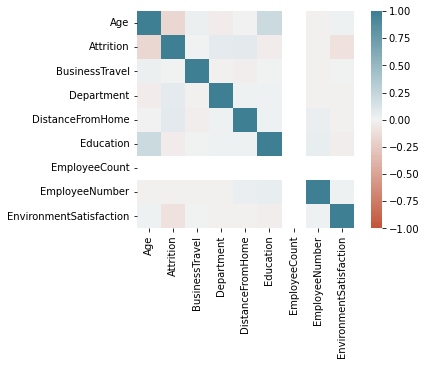

In [339]:
corrMatrix = df_slice1.corr()
sn.heatmap(corrMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True)

### Notes from heat map 1 
#### Attrition ~ -0.16 Age, -0.1 Environment Satisfaction

<AxesSubplot:>

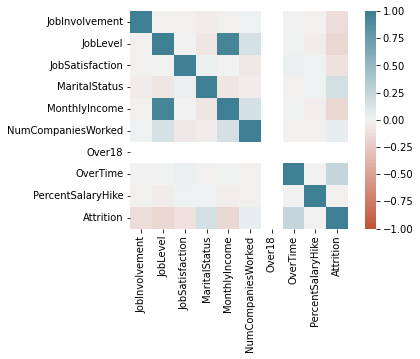

In [340]:
corrMatrix = df_slice2.corr()
sn.heatmap(corrMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True)

### Notes from heat map 2
#### Attrition ~ -0.13 Job Involvement, -.17 Job Level, -0.1 JobSatisfaction, 0.16 Marital Status, -0.16 Monthly Income, 0.25 Overtime

<AxesSubplot:>

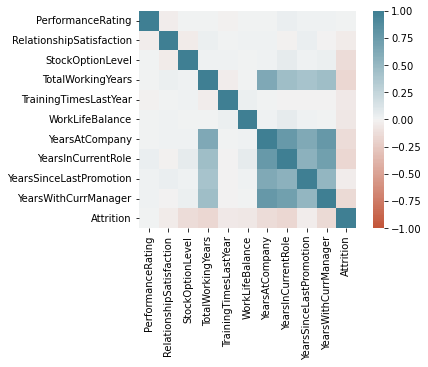

In [351]:
corrMatrix = df_slice3.corr()
sn.heatmap(corrMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True
          )

### Notes from Heat Map 3
#### Attrition ~ -0.14 StockOption, -.017 Total Working Years, -0.13 Years at Company, -0.16 Years in current role, -0.16 Years with Current Manger

In [349]:
#df2["Attrition"].corr(df2["YearsInCurrentRole"])

-0.16054500426770105

## Experimental Code

In [ ]:
#grouped_dept = df.groupby(["Department", "Attrition"]).count()
#grouped_dept.head()

In [ ]:
#print(df.groupby(["Department", "Attrition"]))

In [ ]:
#groups = df.groupby(['Department', 'Attrition'])
#for group_key, group_value in groups:
#    group = groups.get_group(group_key)
#    print(group)
#    print("")

In [394]:
grouped = df.groupby(["BusinessTravel", "Department", "Attrition"]).describe()
pcts =  grouped.groupby(level=0).apply(lambda x:
                                                100 * x / (x.sum()))
pcts.head(30)

Age             \
                                                        count       mean   
BusinessTravel    Department             Attrition                         
Non-Travel        Human Resources        No          4.000000  23.947438   
                  Research & Development No         59.333333  20.020214   
                                         Yes         5.333333  17.617819   
                  Sales                  No         28.666667  20.316848   
                                         Yes         2.666667  18.097682   
Travel_Frequently Human Resources        No          2.527076  18.115743   
                                         Yes         1.444043  14.049994   
                  Research & Development No         52.346570  18.180104   
                                         Yes        13.357401  15.721453   
                  Sales                  No         20.216606  17.841262   
                                         Yes        10.108303  16.091446   
Travel_Rarely     Human Resources        No          3.643337  18.442263   
                                         Yes         0.767018  14.297380   
                  Research & Development No         56.951103  17.684494   
                                         Yes         8.437200  15.895447   
                  Sales                  No         24.448706  17.414217   
                                         Yes         5.752637  16.266199   

                                                                          \
                                                          std        min   
BusinessTravel    Department             Attrition                         
Non-Travel        Human Resources        No         25.526650  25.225225   
                  Research & Development No         20.200373  16.216216   
                                         Yes        23.407870  16.216216   
                  Sales                  No         17.728663  18.918919   
                                         Yes        13.136444  23.423423   
Travel_Frequently Human Resources        No         17.129427  17.647059   
                                         Yes         7.583325  19.117647   
                  Research & Development No         16.154423  17.647059   
                                         Yes        18.182635  14.705882   
                  Sales                  No         18.749550  17.647059   
                                         Yes        22.200641  13.235294   
Travel_Rarely     Human Resources        No         15.802531  21.186441   
                                         Yes        14.394976  16.101695   
                  Research & Development No         16.866080  16.101695   
                                         Yes        19.080825  15.254237   
                  Sales                  No         16.329182  15.254237   
                                         Yes        17.526406  16.101695   

                                                                          \
                                                          25%        50%   
BusinessTravel    Department             Attrition                         
Non-Travel        Human Resources        No         24.603175  23.184358   
                  Research & Development No         19.047619  20.111732   
                                         Yes        16.349206  18.156425   
                  Sales                  No         20.634921  20.111732   
                                         Yes        19.365079  18.435754   
Travel_Frequently Human Resources        No         19.444444  18.858561   
                                         Yes        14.861111  14.143921   
                  Research & Development No         17.777778  18.858561   
                                         Yes        15.555556  15.384615   
                  Sales                  No         17.222222  17.369727   
                            

In [ ]:
# groups = df.groupby(['Department', 'Attrition']).size().groupby()
# print(groups.max())